<a href="https://colab.research.google.com/github/roydendsouza31/AI-Generated-Images-vs-Real-Images/blob/R3/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distinguishing AI-generated images from real images

# **preprocessing dataset**

In [ ]:
#Reducing the size of the datasets due to google colab restrictioins
#Training dataset - reduced by 70%
import os
import random
import shutil

aigenerated_folder = "/content/dataset_train/AIGenerated"
real_folder = "/content/dataset_train/Real"

# Function to get the number of images in a folder
def count_images(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Function to delete % of the images in a folder
def reduce_folder_size(folder_path):
    num_images_before = count_images(folder_path)
    num_images_to_delete = int(num_images_before * 0.7)
    all_images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    images_to_delete = random.sample(all_images, num_images_to_delete)
    for image in images_to_delete:
        os.remove(os.path.join(folder_path, image))
    num_images_after = count_images(folder_path)
    print(f"Deleted {num_images_to_delete} images from {folder_path}")
    print(f"Number of images in {folder_path} before: {num_images_before}, after: {num_images_after}")

# Print the number of images in each folder before reducing the size
print(f"Number of images in {aigenerated_folder}: {count_images(aigenerated_folder)}")
print(f"Number of images in {real_folder}: {count_images(real_folder)}")

# Reduce the size of the AiGenerated and Real folders
reduce_folder_size(aigenerated_folder)
reduce_folder_size(real_folder)


Number of images in /content/dataset_train/AIGenerated: 50000
Number of images in /content/dataset_train/Real: 50000
Deleted 35000 images from /content/dataset_train/AIGenerated
Number of images in /content/dataset_train/AIGenerated before: 50000, after: 15000
Deleted 35000 images from /content/dataset_train/Real
Number of images in /content/dataset_train/Real before: 50000, after: 15000


In [ ]:
#Testing dataset - reduced by 90%
import os
import random
import shutil

aigenerated_folder = "/content/dataset_test/AIGenerated"
real_folder = "/content/dataset_test/Real"

# Function to get the number of images in a folder
def count_images(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Function to delete % of the images in a folder
def reduce_folder_size(folder_path):
    num_images_before = count_images(folder_path)
    num_images_to_delete = int(num_images_before * 0.9)
    all_images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    images_to_delete = random.sample(all_images, num_images_to_delete)
    for image in images_to_delete:
        os.remove(os.path.join(folder_path, image))
    num_images_after = count_images(folder_path)
    print(f"Deleted {num_images_to_delete} images from {folder_path}")
    print(f"Number of images in {folder_path} before: {num_images_before}, after: {num_images_after}")

# Print the number of images in each folder before reducing the size
print(f"Number of images in {aigenerated_folder}: {count_images(aigenerated_folder)}")
print(f"Number of images in {real_folder}: {count_images(real_folder)}")

# Reduce the size of the AiGenerated and Real folders
reduce_folder_size(aigenerated_folder)
reduce_folder_size(real_folder)

Number of images in /content/dataset_test/AIGenerated: 10000
Number of images in /content/dataset_test/Real: 10000
Deleted 9000 images from /content/dataset_test/AIGenerated
Number of images in /content/dataset_test/AIGenerated before: 10000, after: 1000
Deleted 9000 images from /content/dataset_test/Real
Number of images in /content/dataset_test/Real before: 10000, after: 1000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! rm -r /content/simple_images
! rm -r sample_data

In [2]:
data = "C:\\dataset\\ai-v-real-master\\ai-v-real-master\\data\\Processed Data_2\\Training Data"
categories = ['Real', 'AIGenerated']

In [4]:
#Replacing the spaces in file names with _
import os

aigenerated_folder = "C:\Downloadss\content\dataset_train\AIGenerated"
for filename in os.listdir(aigenerated_folder):
    if ' ' in filename:
        os.rename(os.path.join(aigenerated_folder, filename), os.path.join(aigenerated_folder, filename.replace(' ', '_')))


In [5]:
import os

real_folder = "C:\Downloadss\content\dataset_train\Real"
for filename in os.listdir(real_folder):
    if ' ' in filename:
        os.rename(os.path.join(real_folder, filename), os.path.join(real_folder, filename.replace(' ', '_')))


In [3]:
img_size = 48
training_data = []

In [4]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Resizing the images and Normalizing pixel values
import os
import cv2 as cv
for category in categories:
    path = os.path.join(data, category)
    classes = categories.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = cv.imread(img_path)
        if img_array is not None:
            img_resized = cv.resize(img_array, (img_size, img_size))
            img_resized = img_resized / 255.0  # Normalize pixel values to [0, 1]
            training_data.append([img_resized, classes])
        else:
            print(f"Failed to load image: \"{img_path}\"")

print(f"Total images processed: {len(training_data)}")

Total images processed: 65715


In [6]:
len(training_data), training_data[0][0].shape

(65715, (48, 48, 3))

In [7]:
import random

In [8]:
random.shuffle(training_data)
import numpy as np

In [9]:
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

MemoryError: Unable to allocate 3.38 GiB for an array with shape (65715, 48, 48, 3) and data type float64

In [10]:
X_train.shape
y_train.shape

(30675,)

In [11]:
X_train[0].shape

(48, 48, 3)

In [12]:
import PIL
import pickle

In [13]:
pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out, protocol=4)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out, protocol=4)
pickle_out.close()

In [14]:
pickle_in = open("X_train.pickle", "rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle", "rb")
y_train = pickle.load(pickle_in)

This code segment loads data from existing pickle files into memory, then re-saves the same data back into the same pickle files. This process essentially rewrites the pickle files with the same data, potentially updating the files in the process.







In [15]:
X_train.shape
y_train.shape

(30675,)

In [16]:
data = "C:\\dataset\\ai-v-real-master\\ai-v-real-master\\data\\Processed Data_2\\Testing Data"
categories = ['Real', 'AIGenerated']

img_size = 48
testing_data = []

i = 0
for category in categories:
    path = os.path.join(data,category)
    classes = categories.index(category)
    for img in os.listdir(path):
        i = i + 1
        img_array = cv.imread(os.path.join(path,img))
        new_array = cv.resize(img_array, (48,48))
        new_array = new_array/255
        testing_data.append([new_array, classes])

random.shuffle(testing_data)

X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [17]:
X_test.shape
y_test.shape

(2000,)

In [20]:
pip install --upgrade tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential

# Adjust the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

# Adjust the hyperparameters
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
model_new.evaluate(X_test, y_test)
y_pred = model_new.predict(X_test)
y_pred.shape

# Visualize the results
import matplotlib.pyplot as plt

# Plot the training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

# Plot the training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

C:\Users\deepa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 164s 163ms/step - accuracy: 0.7210 - loss: 0.6261 - val_accuracy: 0.7395 - val_loss: 0.6163
Epoch 2/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 133s 138ms/step - accuracy: 0.8460 - loss: 0.3600 - val_accuracy: 0.8470 - val_loss: 0.3653
Epoch 3/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 138s 144ms/step - accuracy: 0.8741 - loss: 0.3051 - val_accuracy: 0.8850 - val_loss: 0.2785
Epoch 4/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 134s 140ms/step - accuracy: 0.8875 - loss: 0.2761 - val_accuracy: 0.8960 - val_loss: 0.2575
Epoch 5/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 133s 139ms/step - accuracy: 0.8979 - loss: 0.2553 - val_accuracy: 0.8530 - val_loss: 0.3135
Epoch 6/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 134s 140ms/step - accuracy: 0.9049 - loss: 0.2331 - val_accuracy: 0.8970 - val_loss: 0.2370
Epoch 7/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 138s 143ms/step - accuracy: 0.9174 - loss: 0.2034 - val_accuracy: 0.8930 - val_loss: 0.2633
Epoch 8/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 138s 144ms/step - accuracy: 0.9265 -

NameError: name 'model_new' is not defined

In [22]:
#Setting the parameters for the model
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (48,48,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

C:\Users\deepa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


 This model architecture consists of convolutional layers for feature extraction, max-pooling layers for spatial downsampling, dropout layers for regularization, and dense layers for classification. The model is compiled with appropriate settings for optimization and evaluation, ready for training on the provided dataset.

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,089 (1.56 MB)

 Trainable params: 409,089 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#Training the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
959/959 ━━━━━━━━━━━━━━━━━━━━ 34s 32ms/step - accuracy: 0.6813 - loss: 0.5857 - val_accuracy: 0.7095 - val_loss: 0.6084
Epoch 2/15
959/959 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.8077 - loss: 0.4286 - val_accuracy: 0.8450 - val_loss: 0.3621
Epoch 3/15
959/959 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.8396 - loss: 0.3615 - val_accuracy: 0.8440 - val_loss: 0.3592
Epoch 4/15
959/959 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.8644 - loss: 0.3193 - val_accuracy: 0.8870 - val_loss: 0.2756
Epoch 5/15
959/959 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.8769 - loss: 0.2879 - val_accuracy: 0.8665 - val_loss: 0.3120
Epoch 6/15
959/959 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.8825 - loss: 0.2748 - val_accuracy: 0.8975 - val_loss: 0.2504
Epoch 7/15
959/959 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.8917 - loss: 0.2619 - val_accuracy: 0.8710 - val_loss: 0.2983
Epoch 8/15
959/959 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step - accuracy: 0.8974 - loss: 0.2478 - 

In [25]:
#Saving the model
model.save("AIGeneratedModel.h5")

In [26]:
#Loading the saved model
model_new = keras.models.load_model("AIGeneratedModel.h5")

In [27]:
model_new.evaluate(X_test, y_test)
y_pred = model_new.predict(X_test)
y_pred.shape

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8826 - loss: 0.2836
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


(2000, 1)

In [28]:
y_predicted = []

for arr in y_pred:
    if arr[0] <= 0.5:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

y_predicted = np.array(y_predicted)

In [29]:
y_predicted.shape

(2000,)

In [30]:
from gettext import install
\
pip install scikit-learn

SyntaxError: invalid syntax (1721373949.py, line 4)

In [31]:
pip install scikit-learn -i https://pypi.org/simple

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1000
           1       0.94      0.82      0.87      1000

    accuracy                           0.88      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.89      0.88      0.88      2000



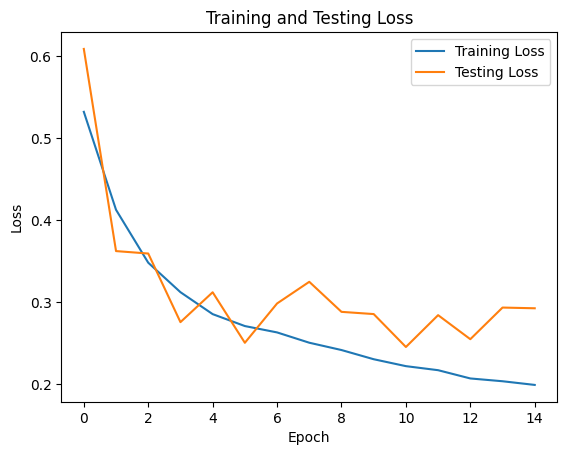

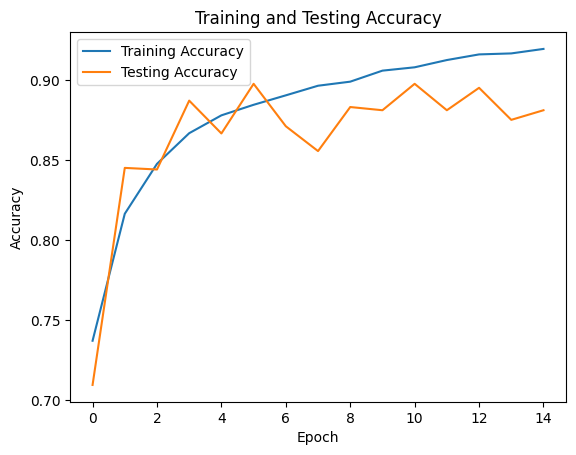

In [34]:
import matplotlib.pyplot as plt
# Plot the training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

# Plot the training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

# Testing

In [35]:
def find_out(path_img):
    img_arr = cv.imread(path_img)
    plt.imshow(img_arr)
    new_arr = cv.resize(img_arr, (48,48))
    new_arr = new_arr/255
    test = []
    test.append(new_arr)
    test = np.array(test).reshape(-1, img_size, img_size, 3)
    y = model_new.predict(test)
    if y[0] <= 0.5:
        print("The given image is Real.")
    else:
        print("The given image is AI Generated.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The given image is Real.


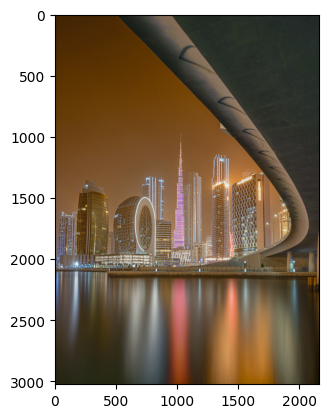

In [40]:
import cv2 as cv
path_img = "C:\Downloadss\content\dataset_train\Real\cityscapes_39.jpeg"
find_out(path_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The given image is AI Generated.


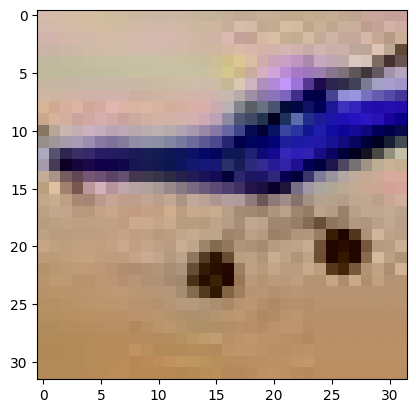

In [41]:
path_img = "F:\Downloads\check2.jpg"
find_out(path_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The given image is AI Generated.


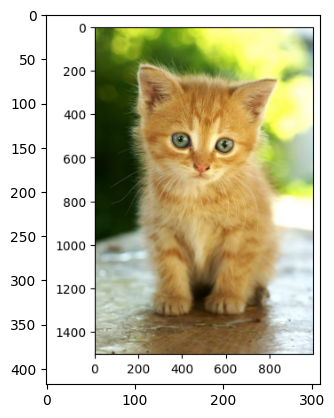

In [42]:
path_img = "F:\Downloads\download (1).png"
find_out(path_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
The given image is AI Generated.


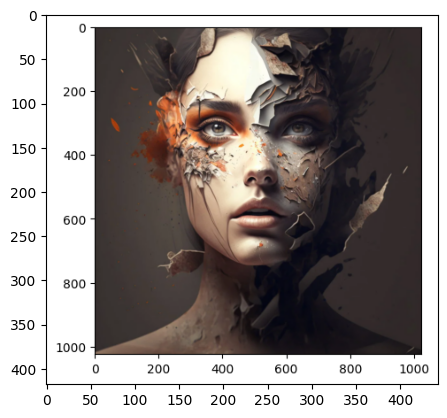

In [75]:
path_img = "F:\Downloads\download (2).png"
find_out(path_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The given image is AI Generated.


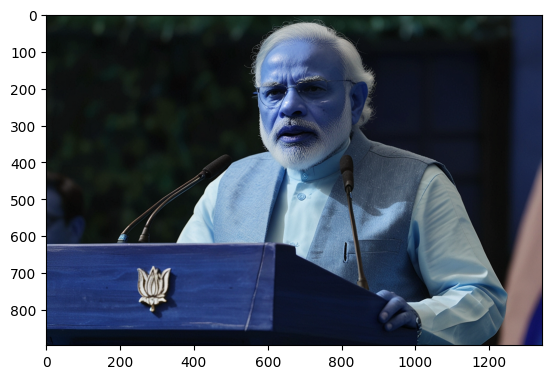

In [37]:
path_img = "F:\Downloads\modiji_test_fake.jpg"
find_out(path_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
The given image is AI Generated.


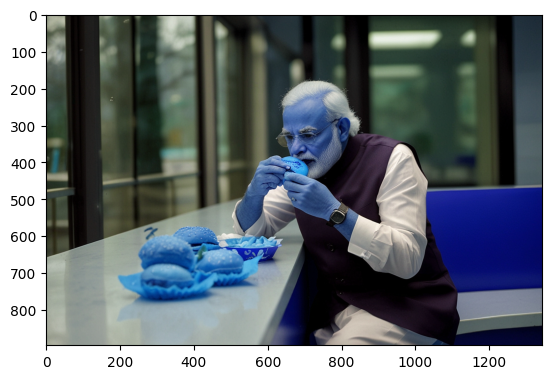

In [43]:
path_img = "F:\\Downloads\\burgur_modi_ai.jpg"
find_out(path_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
The given image is Real.


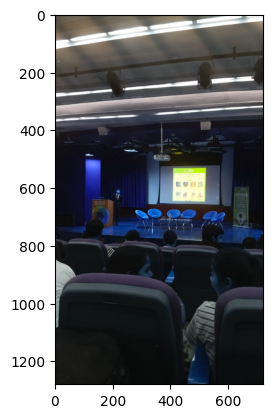

In [44]:
path_img = "F:\\Downloads\\reeaaaaaaaaaaaal.jpg"
find_out(path_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
The given image is AI Generated.


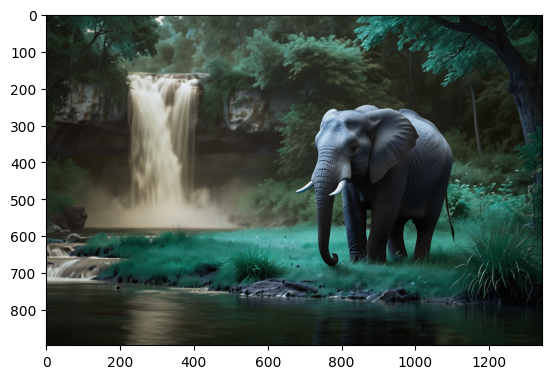

In [47]:

path_img = "F:\Downloads\elephant.jpg"
find_out(path_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
The given image is Real.


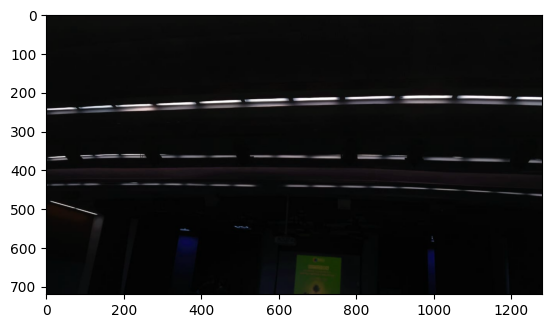

In [48]:

path_img = "F:\Downloads\WhatsApp Image 2024-04-26 at 12.06.40_485ba174.jpg"
find_out(path_img)

In [50]:

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1000
           1       0.94      0.82      0.87      1000

    accuracy                           0.88      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.89      0.88      0.88      2000



In [2]:

print(classification_report(y_test, y_predicted))

NameError: name 'classification_report' is not defined

NEW UPDATED CODE

In [2]:
import os
import cv2
import numpy as np
import pickle
pip install opencv-python-headless
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Define paths to the datasets
training_real_path = "C:/dataset/ai-v-real-master/ai-v-real-master/data/Processed Data_2/Training Data/Real"
training_ai_path = "C:/dataset/ai-v-real-master/ai-v-real-master/data/Processed Data_2/Training Data/AIGenerated"
testing_real_path = "C:/dataset/ai-v-real-master/ai-v-real-master/data/Processed Data_2/Testing Data/REAL"
testing_ai_path = "C:/dataset/ai-v-real-master/ai-v-real-master/data/Processed Data_2/Testing Data/FAKE"

#Replacing the spaces in file names with _

for filename in os.listdir(training_ai_path):
    if ' ' in filename:
        os.rename(os.path.join(training_ai_path, filename), os.path.join(training_ai_path, filename.replace(' ', '_')))


for filename in os.listdir(training_real_path):
    if ' ' in filename:
        os.rename(os.path.join(training_real_path, filename), os.path.join(training_real_path, filename.replace(' ', '_')))



# Function to preprocess images
img_size = 48
training_data = []


def preprocess_image(image_path, img_size):
    img_array = cv2.imread(image_path)
    img_resized = cv2.resize(img_array, (img_size, img_size))
    img_normalized = img_resized / 255.0
    return img_normalized


# Load training data
X_train = []
y_train = []

for folder_path, label in zip([training_real_path, training_ai_path], [0, 1]):
    for filename in os.listdir(folder_path):
        if ' ' in filename:
            os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, filename.replace(' ', '_')))
        img_path = os.path.join(folder_path, filename)
        img = preprocess_image(img_path, 48)
        X_train.append(img)
        y_train.append(label)

# Load testing data
X_test = []
y_test = []

for folder_path, label in zip([testing_real_path, testing_ai_path], [0, 1]):
    for filename in os.listdir(folder_path):
        if ' ' in filename:
            os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, filename.replace(' ', '_')))
        img_path = os.path.join(folder_path, filename)
        img = preprocess_image(img_path, 48)
        X_test.append(img)
        y_test.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Shuffle training data
shuffle_index = np.random.permutation(len(X_train))
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [4]:
pip install opencv-python-headless numpy tensorflow scikit-learn matplotlib

In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Function to replace spaces in file names with underscores
def replace_spaces_with_underscores(folder):
    for filename in os.listdir(folder):
        if ' ' in filename:
            os.rename(os.path.join(folder, filename), os.path.join(folder, filename.replace(' ', '_')))

# Define dataset paths
training_real_path = "C:/dataset/ai-v-real-master/ai-v-real-master/data/Processed Data_2/Training Data/Real"
training_ai_path = "C:/dataset/ai-v-real-master/ai-v-real-master/data/Processed Data_2/Training Data/AIGenerated"
testing_real_path = "C:/dataset/ai-v-real-master/ai-v-real-master/data/Processed Data_2/Testing Data/REAL"
testing_ai_path = "C:/dataset/ai-v-real-master/ai-v-real-master/data/Processed Data_2/Testing Data/FAKE"

# Replace spaces in file names with underscores
replace_spaces_with_underscores(training_real_path)
replace_spaces_with_underscores(training_ai_path)
replace_spaces_with_underscores(testing_real_path)
replace_spaces_with_underscores(testing_ai_path)

# Function to load and preprocess images
def load_images(path, label):
    images = []
    labels = []
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = cv2.resize(img, (48, 48))  # Resize
            img = img / 255.0  # Normalize
            images.append(img)
            labels.append(label)
        else:
            print(f"Failed to load image: {img_path}")
    return images, labels

# Load training data
real_images, real_labels = load_images(training_real_path, 0)
ai_images, ai_labels = load_images(training_ai_path, 1)

# Combine and shuffle training data
images = real_images + ai_images
labels = real_labels + ai_labels
images, labels = shuffle(images, labels, random_state=42)

# Convert lists to numpy arrays
X_train = np.array(images)
y_train = np.array(labels)

# Load testing data
test_real_images, test_real_labels = load_images(testing_real_path, 0)
test_ai_images, test_ai_labels = load_images(testing_ai_path, 1)

# Combine testing data
X_test = np.array(test_real_images + test_ai_images)
y_test = np.array(test_real_labels + test_ai_labels)

# Shuffle testing data
X_test, y_test = shuffle(X_test, y_test, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).flatten()
print(classification_report(y_test, y_pred_classes))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Function to predict image class
def find_out(path_img):
    img_arr = cv2.imread(path_img)
    plt.imshow(img_arr)
    new_arr = cv2.resize(img_arr, (48, 48))
    new_arr = new_arr / 255
    test = []
    test.append(new_arr)
    test = np.array(test).reshape(-1, 48, 48, 3)
    y = model.predict(test)
    if y[0] <= 0.5:
        print("The given image is Real.")
    else:
        print("The given image is AI Generated.")

# Test the find_out function
path_img = "C:/dataset/ai-v-real-master/ai-v-real-master/data/Processed Data_2/Training Data/Real/cityscapes_39.jpeg"
find_out(path_img)

path_img = "F:/Downloads/check2.jpg"
find_out(path_img)


MemoryError: Unable to allocate 3.38 GiB for an array with shape (65715, 48, 48, 3) and data type float64

In [5]:
# Function to load and preprocess images in batches
def load_and_preprocess_images_in_batches(path, label, batch_size):
    images = []
    labels = []
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = cv2.resize(img, (48, 48))  # Resize
            img = img / 255.0  # Normalize
            images.append(img)
            labels.append(label)
        else:
            print(f"Failed to load image: {img_path}")

        # If the batch is full, preprocess and yield it
        if len(images) == batch_size:
            yield np.array(images), np.array(labels)
            images = []
            labels = []

    # Yield the remaining images if any
    if images:
        yield np.array(images), np.array(labels)

# Define batch size
batch_size = 1000

# Load and preprocess training data in batches
X_train_batches = []
y_train_batches = []

for path, label in [(training_real_path, 0), (training_ai_path, 1)]:
    for batch_images, batch_labels in load_and_preprocess_images_in_batches(path, label, batch_size):
        X_train_batches.append(batch_images)
        y_train_batches.append(batch_labels)

# Concatenate batches
X_train = np.concatenate(X_train_batches, axis=0)
y_train = np.concatenate(y_train_batches, axis=0)

# Load and preprocess testing data
X_test, y_test = [], []

for path, label in [(testing_real_path, 0), (testing_ai_path, 1)]:
    images, labels = [], []
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = cv2.resize(img, (48, 48))  # Resize
            img = img / 255.0  # Normalize
            images.append(img)
            labels.append(label)
        else:
            print(f"Failed to load image: {img_path}")
    
    X_test.extend(images)
    y_test.extend(labels)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Shuffle training data
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).flatten()
print(classification_report(y_test, y_pred_classes))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

MemoryError: Unable to allocate 52.7 MiB for an array with shape (1000, 48, 48, 3) and data type float64

In [6]:
# Function to load and preprocess images in batches
def load_and_preprocess_images_in_batches(path, label, batch_size):
    images = []
    labels = []
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = cv2.resize(img, (48, 48))  # Resize
            img = img / 255.0  # Normalize
            images.append(img)
            labels.append(label)
        else:
            print(f"Failed to load image: {img_path}")

        # If the batch is full, preprocess and yield it
        if len(images) == batch_size:
            yield np.array(images), np.array(labels)
            images.clear()
            labels.clear()

    # Yield the remaining images if any
    if images:
        yield np.array(images), np.array(labels)

# Define batch size
batch_size = 500

# Load and preprocess training data in batches
X_train_batches = []
y_train_batches = []

for path, label in [(training_real_path, 0), (training_ai_path, 1)]:
    for batch_images, batch_labels in load_and_preprocess_images_in_batches(path, label, batch_size):
        X_train_batches.append(batch_images)
        y_train_batches.append(batch_labels)

# Concatenate batches
X_train = np.concatenate(X_train_batches, axis=0)
y_train = np.concatenate(y_train_batches, axis=0)

# Load and preprocess testing data
X_test, y_test = [], []

for path, label in [(testing_real_path, 0), (testing_ai_path, 1)]:
    images, labels = [], []
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = cv2.resize(img, (48, 48))  # Resize
            img = img / 255.0  # Normalize
            images.append(img)
            labels.append(label)
        else:
            print(f"Failed to load image: {img_path}")
    
    X_test.extend(images)
    y_test.extend(labels)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Shuffle training data
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).flatten()
print(classification_report(y_test, y_pred_classes))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

MemoryError: Unable to allocate 3.38 GiB for an array with shape (65715, 48, 48, 3) and data type float64

In [10]:
aigenerated_folder = "C:/dataset/ai-v-real-master/ai-v-real-master/data/Processed Data_2/Training Data/AIGenerated"
real_folder = "C:/dataset/ai-v-real-master/ai-v-real-master/data/Processed Data_2/Training Data/Real"

In [1]:
import os
import cv2 as cv
import numpy as np

# Define image size
img_size = 48

# Function to load and preprocess images
def load_images(path):
    data = []
    for category in os.listdir(path):
        classes = 1 if category == 'AIGenerated' else 0
        category_path = os.path.join(path, category)
        for img in os.listdir(category_path):
            img_path = os.path.join(category_path, img)
            img_array = cv.imread(img_path)
            if img_array is not None:
                img_resized = cv.resize(img_array, (img_size, img_size))
                img_resized = img_resized / 255.0  # Normalize pixel values
                data.append([img_resized, classes])
            else:
                print(f"Failed to load image: \"{img_path}\"")
    return data

# Load training and testing data
X_train = np.array(load_images("C:/dataset/ai-v-real-master/ai-v-real-master/data/Processed Data_2/Training Data"))
X_test = np.array(load_images("C:/dataset/ai-v-real-master/ai-v-real-master/data/Processed Data_2/Testing Data"))

# Shuffle the data
np.random.shuffle(X_train)
np.random.shuffle(X_test)

# Separate features and labels
X_train, y_train = np.array([x[0] for x in X_train]), np.array([x[1] for x in X_train])
X_test, y_test = np.array([x[0] for x in X_test]), np.array([x[1] for x in X_test])

# Reshape data for model input
X_train = X_train.reshape(-1, img_size, img_size, 3)
X_test = X_test.reshape(-1, img_size, img_size, 3)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (65715, 2) + inhomogeneous part.

In [11]:
import os
import cv2 as cv
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define dataset paths
train_real_dir = "C:/dataset/ai-v-real-master/ai-v-real-master/data/Processed Data_2/Training Data/Real"
train_ai_dir = "C:/dataset/ai-v-real-master/ai-v-real-master/data/Processed Data_2/Training Data/AIGenerated"
test_real_dir = "C:/dataset/ai-v-real-master/ai-v-real-master/data/Processed Data_2/Testing Data/Real"
test_ai_dir = "C:/dataset/ai-v-real-master/ai-v-real-master/data/Processed Data_2/Testing Data/AIGenerated"

test_dir = "C:\dataset\\ai-v-real-master\\ai-v-real-master\\data\\Processed Data_2\\Testing Data"

train_dir = "C:\dataset\\ai-v-real-master\\ai-v-real-master\\data\\Processed Data_2\\Training Data"
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(48, 48),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(48, 48),
                                                  batch_size=32,
                                                  class_mode='binary')

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=15,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // test_generator.batch_size)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test accuracy:', test_acc)



Found 65714 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


C:\Users\deepa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/15


C:\Users\deepa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 159/2053 ━━━━━━━━━━━━━━━━━━━━ 8:16 262ms/step - accuracy: 0.6223 - loss: 0.6434

C:\Users\deepa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 920/2053 ━━━━━━━━━━━━━━━━━━━━ 5:08 272ms/step - accuracy: 0.7052 - loss: 0.5670

C:\Users\deepa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


2053/2053 ━━━━━━━━━━━━━━━━━━━━ 637s 308ms/step - accuracy: 0.7373 - loss: 0.5281 - val_accuracy: 0.7264 - val_loss: 0.5287
Epoch 2/15
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 0s 107us/step - accuracy: 0.8125 - loss: 0.1838 - val_accuracy: 0.8125 - val_loss: 0.2872
Epoch 3/15


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2053/2053 ━━━━━━━━━━━━━━━━━━━━ 628s 305ms/step - accuracy: 0.8339 - loss: 0.3801 - val_accuracy: 0.8254 - val_loss: 0.3835
Epoch 4/15
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 0s 106us/step - accuracy: 0.8750 - loss: 0.1420 - val_accuracy: 0.6250 - val_loss: 0.3662
Epoch 5/15
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 619s 301ms/step - accuracy: 0.8552 - loss: 0.3397 - val_accuracy: 0.8288 - val_loss: 0.3713
Epoch 6/15
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 0s 108us/step - accuracy: 0.9062 - loss: 0.1247 - val_accuracy: 0.6875 - val_loss: 0.2685
Epoch 7/15
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 588s 285ms/step - accuracy: 0.8684 - loss: 0.3174 - val_accuracy: 0.8850 - val_loss: 0.2742
Epoch 8/15
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 0s 81us/step - accuracy: 0.8750 - loss: 0.1331 - val_accuracy: 0.8750 - val_loss: 0.1135
Epoch 9/15
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 574s 279ms/step - accuracy: 0.8779 - loss: 0.2957 - val_accuracy: 0.7888 - val_loss: 0.4816
Epoch 10/15
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 0s 117us/step - accuracy: 0.7812 - lo

In [ ]:
# Classification report
test_generator_shuffle = shuffle(test_generator)
predictions = model.predict(test_generator_shuffle)
y_pred = np.round(predictions)
labels = test_generator_shuffle.classes
print(classification_report(labels, y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Save the model
model.save("AIGeneratedModel_updated.h5")


In [12]:
# Get test images and labels
test_images, test_labels = [], []
for images, labels in test_generator:
    test_images.append(images)
    test_labels.append(labels)
test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

# Predict on test images
predictions = model.predict(test_images)
y_pred = np.round(predictions)

# Classification report
print(classification_report(test_labels, y_pred))


MemoryError: Unable to allocate 864. KiB for an array with shape (32, 48, 48, 3) and data type float32

In [ ]:
import cv2 as cv
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("AIGeneratedModel_updated.h5")

def classify_image(image_path):
    img = cv.imread(image_path)
    img = cv.resize(img, (48, 48))
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    prediction = model.predict(img)
    if prediction[0] <= 0.5:
        return "Real"
    else:
        return "AI Generated"

# Example usage
image_path = "C:/path/to/your/image.jpg"
result = classify_image(image_path)
print("The given image is:", result)


In [ ]:
# Function to predict image class 
def find_out(path_img):
    img_arr = cv2.imread(path_img)
    plt.imshow(img_arr)
    new_arr = cv2.resize(img_arr, (48, 48))
    new_arr = new_arr / 255
    test = []
    test.append(new_arr)
    test = np.array(test).reshape(-1, 48, 48, 3)
    y = model.predict(test)
    if y[0] <= 0.5:
        print("The given image is Real.")
    else:
        print("The given image is AI Generated.")

# Test the find_out function
path_img = "C:/dataset/ai-v-real-master/ai-v-real-master/data/Processed Data_2/Training Data/Real/cityscapes_39.jpeg"
find_out(path_img)

path_img = "F:/Downloads/check2.jpg"
find_out(path_img)
